# Fastag-fraud-detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

## 1. Project Overview

This project Focuses on developing a robust machine learning- based fraud detection system for fastag transactions. Fastag in an electronic toll collection system in indian that uses RFID technology to make toll payments directly from a prepaid account linked to a user's vehicle. as digital transactions become machine learning classification techniques to accurately also increases. This Project aims to leverage machine learning classification techniques to accurately identify fraudulent transactions, thereby ensuring the security and integrity of fastag Transactions.

In [2]:
df = pd.read_csv(r'C:\Users\chira\Downloads\FastagFraudDetection.csv')
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,01-07-2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,01-08-2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,01-09-2023 02:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,01-10-2023 06:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,01-01-2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,02-05-2023 05:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# 2.Dataset Description
The Dataset Comprises Various Features related to fastag Transcation, including transactiondetails, vehicle information, geographical location, and transcation amounts. The key features are:

Transcation_ID : Unique Identifier fro each transaction.

Timestamp: Date and time of the transaction.

Vehicle_Type: Type of vehicle involved in the transaction.

FastagID: Unique identifier for Fastag.

TollBoothID: Identifier for the toll booth.

Lane_Type: Type of lane used for the transaction.

Vehicle_Dimensions: Dimensions of the vehicle.

Transaction_Amount: Amount associated with the transaction.

Amount_paid: Amount paid for the transaction.

Geographical_Location: Location details of the transaction.

Vehicle_Speed: Speed of the vehicle during the transaction.

Vehicle_Plate_Number: License plate number of the vehicle.

Fraud_indicator: Binary indicator of fraudulent activity (target variable).

Timestamp: Date and time of the transaction.

Vehicle_Type: Type of vehicle involved in the transaction.

FastagID: Unique identifier for Fastag.

TollBoothID: Identifier for the toll booth.

Lane_Type: Type of lane used for the transaction.

Vehicle_Dimensions: Dimensions of the vehicle.

Transaction_Amount: Amount associated with the transaction.

Amount_paid: Amount paid for the transaction.

Geographical_Location: Location details of the transaction.

Vehicle_Speed: Speed of the vehicle during the transaction.

Vehicle_Plate_Number: License plate number of the vehicle.

Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,01-07-2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,01-08-2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,01-09-2023 02:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,01-10-2023 06:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,01-01-2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,02-05-2023 05:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,03-10-2023 00:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [5]:
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4119,4120,3/29/2023 14:30,Motorcycle,NaN,D-106,Regular,Small,0,0,"12.936687032945434, 77.53113977439017",78,MH12EF2345,Not Fraud
2979,2980,11/22/2023 0:58,Truck,FTG-480-TGB-250,C-103,Regular,Large,350,350,"13.059816123454882, 77.77068662374292",91,KA89PQ4567,Not Fraud
642,643,04-08-2023 13:55,Sedan,FTG-823-NMK-365,A-101,Express,Medium,100,100,"13.042660878688794, 77.47580097259879",45,AP01AB1234,Not Fraud
2644,2645,02-04-2023 06:25,Van,FTG-125-DCF-765,B-102,Express,Medium,140,140,"13.059816123454882, 77.77068662374292",45,KA49ST4567,Not Fraud
2036,2037,9/13/2023 4:05,SUV,FTG-455-QRS-789,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",49,AP03OP9012,Not Fraud


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


# Summary Statistics
We use summary  statistics to get sn overview of the numerical features.

# Numerical Summary Statistics:
Count: The Number Of Non-missing Values.

Mean: The Average value.

Std: The Standard Deviation, indicating the spread of the values.

min: The Minimum Value.

25%: The 25th precentike value (first quartile).

50%: The median value(second quartile).

75%: The 75th percentile value (third quartile).

max: The maximum value.

median: The median value, explicitly added for clarity.

mode: The most frequently occurring value.

missing_values: The count of missing values in each column.

In [7]:
df . describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:
df.select_dtypes("number").mean()

Transaction_ID        2500.5000
Transaction_Amount     161.0620
Amount_paid            141.2610
Vehicle_Speed           67.8512
dtype: float64

In [9]:
df.select_dtypes("number").median()

Transaction_ID        2500.5
Transaction_Amount     130.0
Amount_paid            120.0
Vehicle_Speed           67.0
dtype: float64

In [10]:
df.select_dtypes('number').mode().iloc[0]

Transaction_ID         1.0
Transaction_Amount     0.0
Amount_paid            0.0
Vehicle_Speed         55.0
Name: 0, dtype: float64

In [11]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [12]:
df["FastagID"].fillna(df["FastagID"].mode()[0], inplace=True)

In [13]:
df.isnull().sum()


Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [15]:
df.drop_duplicates(inplace = True)
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,01-07-2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,01-08-2023 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,01-09-2023 02:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,01-10-2023 06:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,01-01-2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,02-05-2023 05:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# 5. Data Visualization

# 6. Visualize the distribution of the target variable

<function matplotlib.pyplot.show(close=None, block=None)>

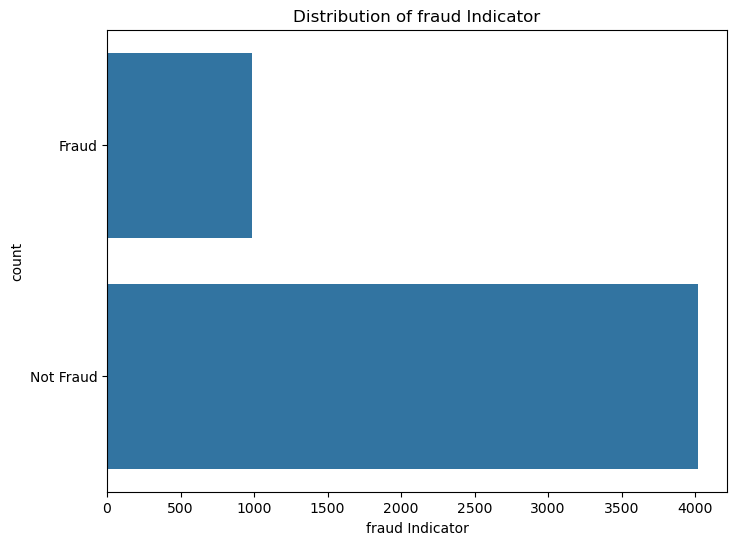

In [16]:
plt.figure(figsize= (8,6))
sns.countplot(df['Fraud_indicator'])
plt.title('Distribution of fraud Indicator')
plt.xlabel("fraud Indicator")
plt.ylabel("count")
plt.show

# 7. Visualize the Distribution of Transaction Amounts

<function matplotlib.pyplot.show(close=None, block=None)>

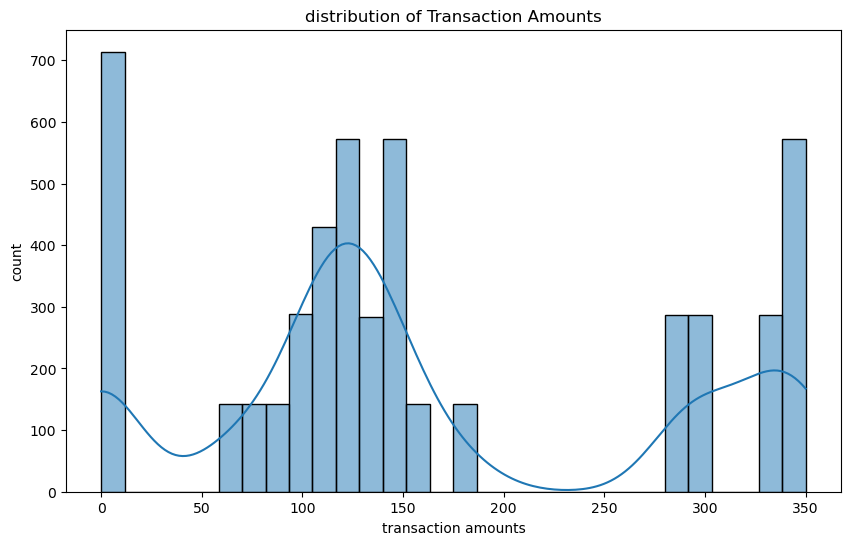

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'], bins=30 ,kde = True)
plt.title("distribution of Transaction Amounts")
plt.xlabel("transaction amounts")
plt.ylabel("count")
plt.show

# 8. Visualize the Distribution of Amount Paid

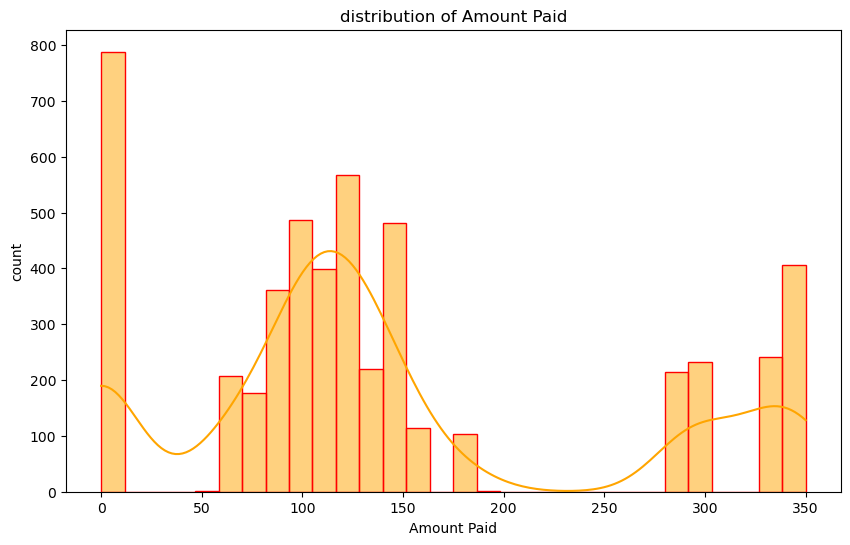

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount_paid'], bins=30, kde = True, color="orange", edgecolor="red")
plt.title('distribution of Amount Paid')
plt.xlabel("Amount Paid")
plt.ylabel("count")
plt.show()

# 9. Visualize the distribution of Vechicle Speed

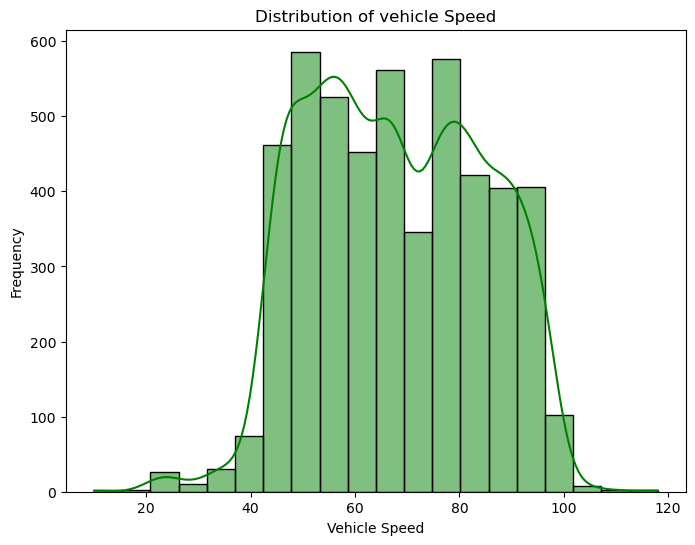

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df['Vehicle_Speed'],bins=20, kde=True, color="green", edgecolor="black")
plt.title("Distribution of vehicle Speed")
plt.xlabel("Vehicle Speed")
plt.ylabel("Frequency")
plt.show()

# 10. Visualize the relationship Between Transcation Amount And Amount paid

Text(0.5, 1.0, 'Transaction Amount VS Amount Paid')

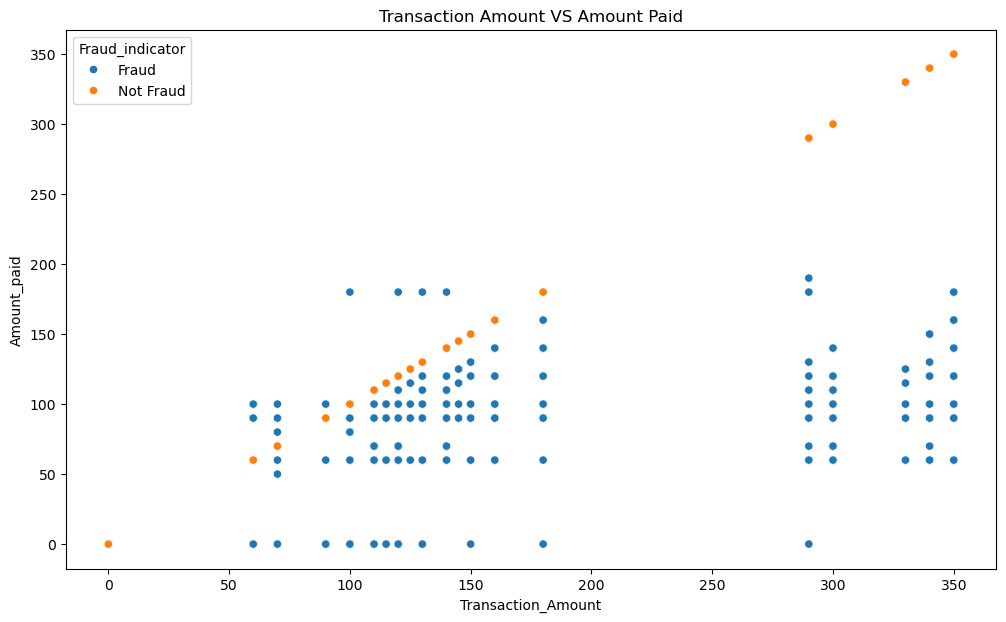

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="Transaction_Amount", y = "Amount_paid", hue= "Fraud_indicator", data=df)
plt.title("Transaction Amount VS Amount Paid")

# 11. Countplots For Vehicle type variables by Fraud indicator

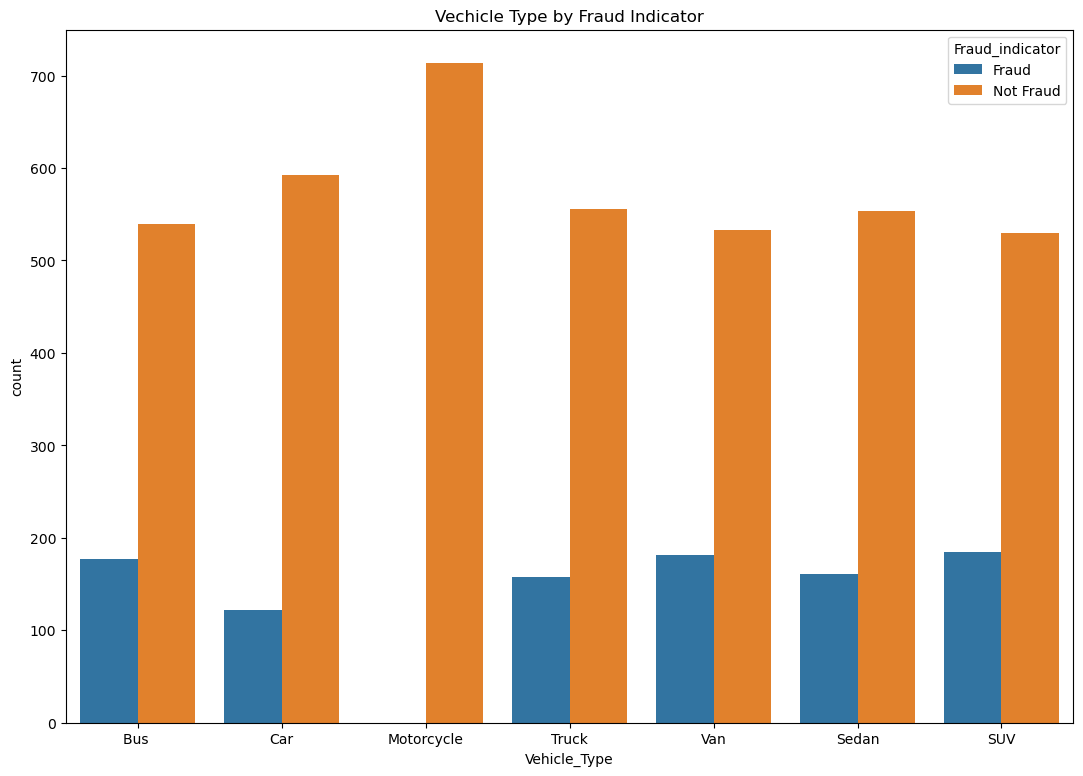

In [21]:
plt.figure(figsize=(13,9))
sns.countplot(x="Vehicle_Type",hue= "Fraud_indicator", data=df)
plt.title("Vechicle Type by Fraud Indicator")
plt.show()

# 12. Countplot for Lane Type variables by fraud Indicator

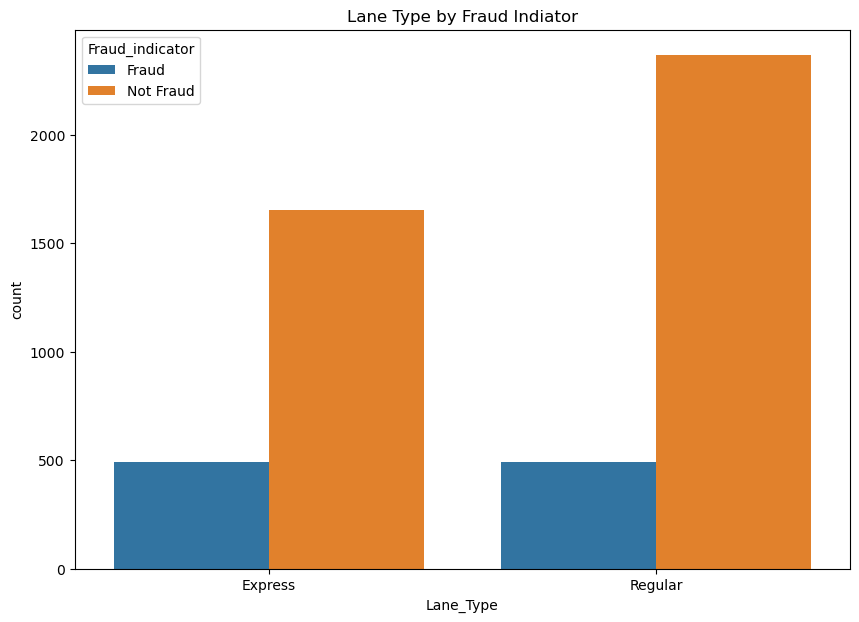

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x="Lane_Type", hue="Fraud_indicator", data=df)
plt.title("Lane Type by Fraud Indiator")
plt.show()

# 13. Countplots for Geographical Loation Variables by Fraud indicator

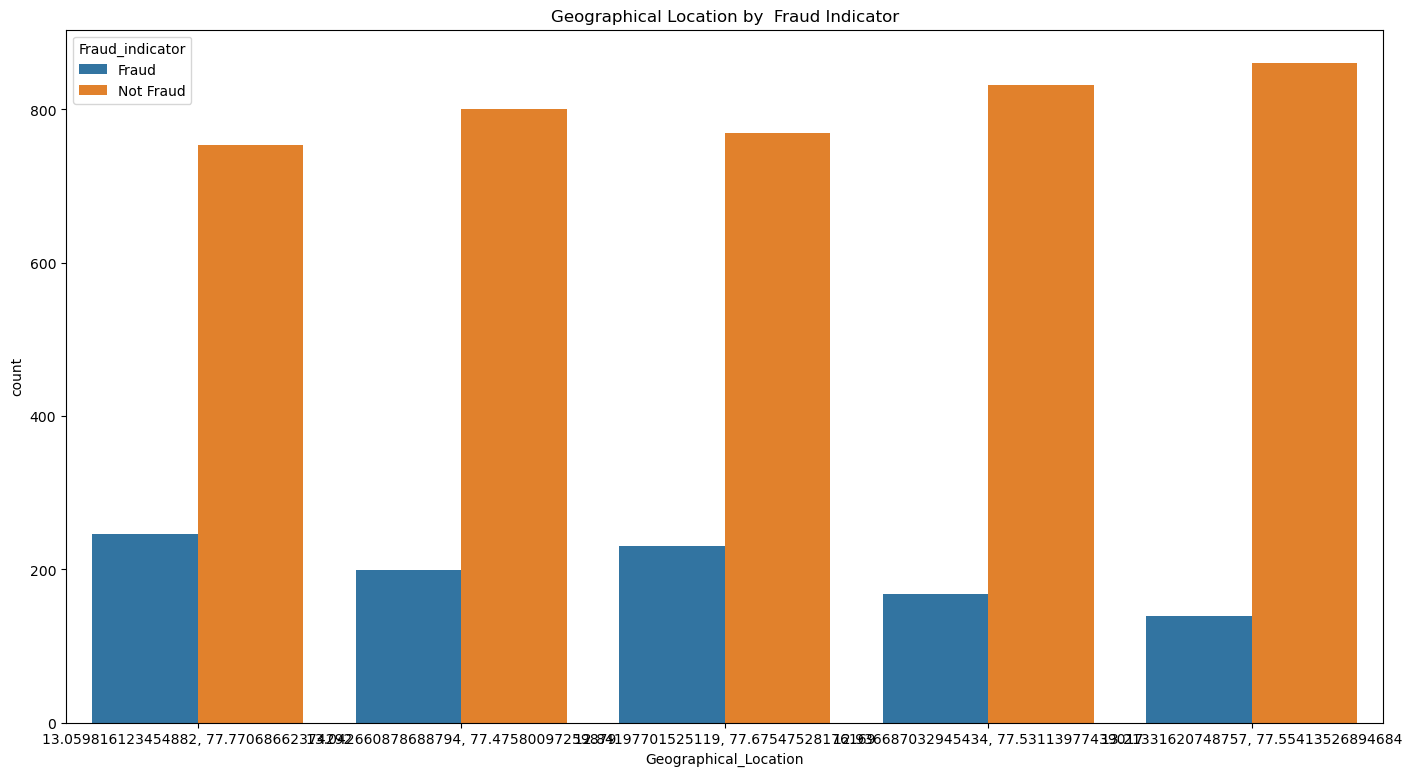

In [23]:
plt.figure(figsize=(17,9))
sns.countplot(x="Geographical_Location", hue="Fraud_indicator", data=df)
plt.title("Geographical Location by  Fraud Indicator")
plt.show()

# 14. Check the  Pair plot

C:\Users\chira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


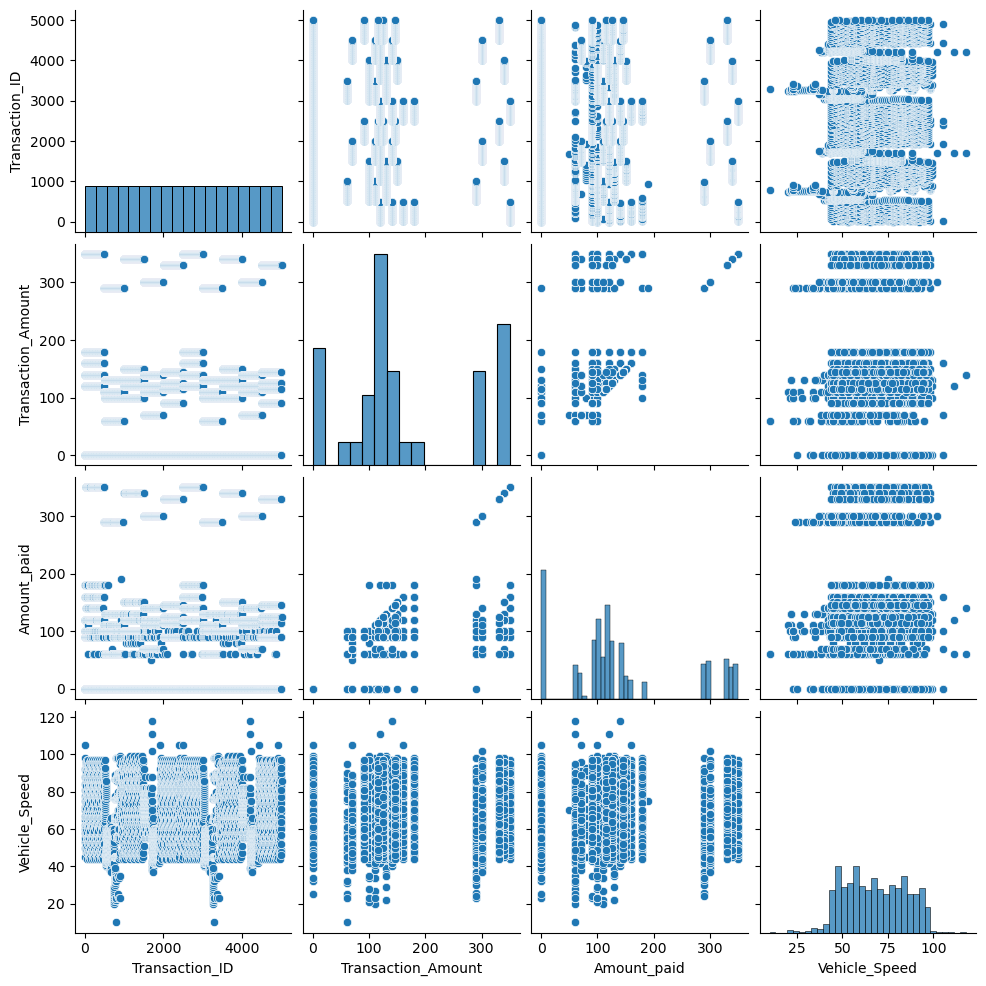

In [24]:
sns.pairplot(df)

# 15. Heat Map

In [25]:
df1 = df.select_dtypes('number')
df1

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
2,3,0,0,53
3,4,350,120,92
4,5,140,100,60
...,...,...,...,...
4995,4996,330,330,81
4996,4997,125,125,64
4997,4998,115,115,93
4998,4999,145,145,57


In [26]:
df1.corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,-0.023515,0.044433,0.014378
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229
Amount_paid,0.044433,0.870078,1.000000,0.039027
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000


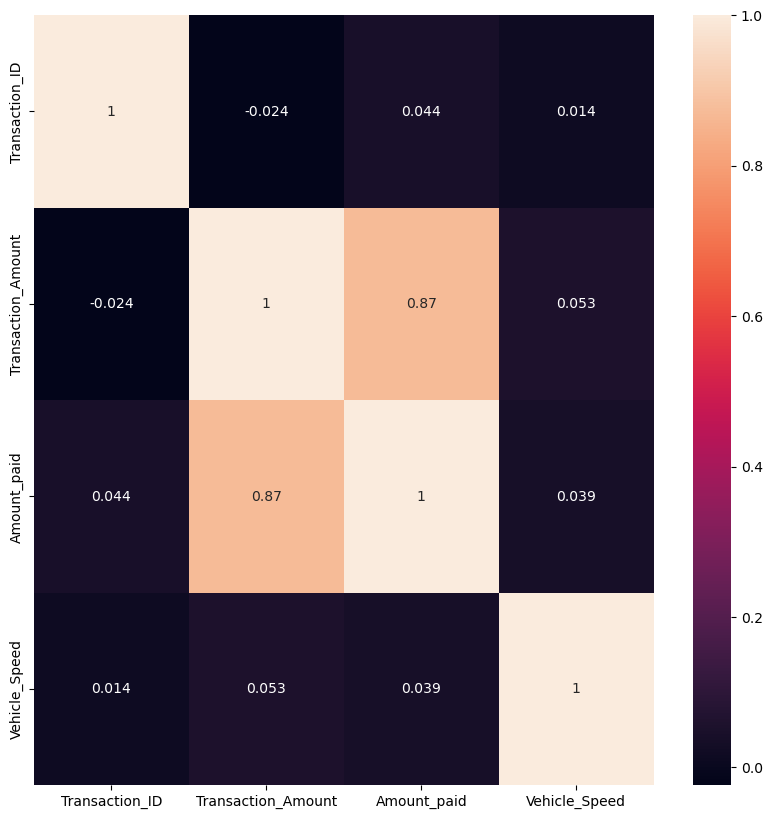

In [27]:

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr() ,annot = True)
plt.show()

# 16. Label Encoding for Categorical Features: Ensure that Categorical Features are Encoded.

In [28]:
label_encoders = {}
for column in ["Vehicle_Type", "Lane_Type", "Vehicle_Dimensions", "Geographical_Location", "Vehicle_Plate_Number", "Fraud_indicator", "FastagID", "TollBoothID",]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column]=le

In [29]:
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,0,2,0,0,0,350,120,3,65,1482,0
1,2,01-07-2023 14:55,1,9,1,1,2,120,100,3,78,3066,0
2,3,01-08-2023 18:25,2,0,3,1,2,0,0,3,53,3663,1


# 17. Feature Extraction: Additional time-based featues(Hour, Day, Month, Weekday) have been extracted from the Times-tamp

In [30]:
# Covert Timestamp to datetime and extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday
df.sample(6)


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
1131,1132,2023-06-18 07:30:00,6,1435,1,1,1,130,130,0,76,1699,1,7,18,6,6
118,119,2023-01-07 14:55:00,3,778,1,0,0,180,120,3,44,1323,0,14,7,1,5
2301,2302,2023-06-18 10:30:00,4,1729,0,1,1,115,115,4,88,431,1,10,18,6,6
2913,2914,2023-11-06 15:38:00,0,2421,2,1,0,350,350,3,76,3198,1,15,6,11,0
953,954,2023-07-02 18:18:00,1,3513,0,1,2,60,60,2,82,3539,1,18,2,7,6
3136,3137,2023-09-21 01:33:00,3,3926,1,0,0,130,130,2,44,4176,1,1,21,9,3


In [32]:
# Drop the original timestamp coplumn and trransaction_ID as it is not informative 
df.drop(columns=['Timestamp', "Transaction_ID"], inplace=True)

In [33]:
df.head(5)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
0,0,2,0,0,0,350,120,3,65,1482,0,11,6,1,4
1,1,9,1,1,2,120,100,3,78,3066,0,14,7,1,5
2,2,0,3,1,2,0,0,3,53,3663,1,18,8,1,6
3,5,241,2,1,0,350,120,3,92,1498,0,2,9,1,0
4,6,2860,1,0,1,140,100,3,60,2409,0,6,10,1,1


# 17.1 Model Training: Train A Variety of Machine Learning Models(e.g, Logistic Regression, Random Forest, Gradient Boosting).

# 17.2 Model Evaluation: Evalute model Performance  using metrics  such as precision, recall, F1 score, and Accuray. Additionally, handle class imbalance using techniques such as SMOTE(Synthenic Minority Over-smapling Technique)if necessary 

In [35]:
x = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
x_train, x_test, y_train, y_test

(      Vehicle_Type  FastagID  TollBoothID  Lane_Type  Vehicle_Dimensions  \
 4227             4       155            0          1                   1   
 4676             3      1028            1          0                   0   
 800              2         0            5          1                   2   
 3671             2         0            5          1                   2   
 4193             3      1369            1          1                   0   
 ...            ...       ...          ...        ...                 ...   
 4426             1      2434            0          0                   2   
 466              6      3232            1          0                   1   
 3092             6      3449            1          0                   1   
 3772             4       716            0          0                   1   
 860              3      3585            1          0                   0   
 
       Transaction_Amount  Amount_paid  Geographical_Location  Vehicle_Spe

# 18 Logistic Regression Model

In [36]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\chira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [40]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print("confusion Matrix :", conf_matrix)
print("Precision:", precision)
print("recall:", recall)
print("F1 Score", f1)

Logistic Regression Model Results:
Accuracy: 0.984
confusion Matrix : [[201  16]
 [  0 783]]
Precision: 0.9799749687108886
recall: 1.0
F1 Score 0.9898862199747156


# 19. Decision tree classification

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [52]:
accuracy1 = accuracy_score(y_test,y_pred1)
conf_matrix1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1)

print("Decision Tree Classification Model Results:")
print("Accuracy:", accuracy1)
print("confusion Matrix :", conf_matrix1)
print("Precision:", precision1)
print("recall:", recall1)
print("F1 Score", f11)

Decision Tree Classification Model Results:
Accuracy: 0.997
confusion Matrix : [[216   1]
 [  2 781]]
Precision: 0.9987212276214834
recall: 0.9974457215836526
F1 Score 0.9980830670926517


In [46]:
model.score(x_train, y_train)

0.9865

In [47]:
model.score(x_test,y_test)

0.984

# 20. Random Forest

In [48]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred2 = model2.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [51]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)

print("Random Forest Classification Model Results:")
print("Accuracy:", accuracy2)
print("confusion Matrix :", conf_matrix2)
print("Precision:", precision2)
print("recall:", recall2)
print("F1 Score", f12)

Random Forest Classification Model Results:
Accuracy: 0.975
confusion Matrix : [[192  25]
 [  0 783]]
Precision: 0.969059405940594
recall: 1.0
F1 Score 0.9842866121935889


# 21.Support Vector Machine

In [54]:
from sklearn.svm import SVC

In [57]:
model3 = SVC()
model3.fit(x_train, y_train)

SVC()

In [58]:
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [64]:
accuracy3 = accuracy_score(y_test,y_pred3)
conf_matrix3 = confusion_matrix(y_test,y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test,y_pred3)
f13 = f1_score(y_test,y_pred3)

print("SVM Model Results:")
print("Accuracy:", accuracy3)
print("confusion Matrix :", conf_matrix3)
print("Precision:", precision3)
print("recall:", recall3)
print("F1 Score", f13)

SVM Model Results:
Accuracy: 0.793
confusion Matrix : [[ 10 207]
 [  0 783]]
Precision: 0.7909090909090909
recall: 1.0
F1 Score 0.883248730964467


# 22. Navie bayes Calassifier

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
model4 = GaussianNB()
model4.fit(x_train, y_train)

GaussianNB()

In [63]:
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [65]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)

print("Navie Bayes Model Results:")
print("Accuracy:", accuracy4)
print("confusion Matrix :", conf_matrix4)
print("Precision:", precision4)
print("recall:", recall4)
print("F1 Score", f14)

Navie Bayes Model Results:
Accuracy: 0.777
confusion Matrix : [[148  69]
 [154 629]]
Precision: 0.9011461318051576
recall: 0.8033205619412516
F1 Score 0.849426063470628


# 23 K neighborsClassifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier


In [71]:
 model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [72]:
 y_pred5 = model5.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [73]:
accuracy5 = accuracy_score(y_test, y_pred5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
print("KNN Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)


KNN Model Results:
Accuracy: 0.797
Confusion Matrix: [[ 62 155]
 [ 48 735]]
Precision: 0.8258426966292135
Recall: 0.9386973180076629
F1 Score: 0.8786610878661087


# 24 grandient boosting classification

In [66]:
model6 = GradientBoostingClassifier()
model6.fit(x_train, y_train)


GradientBoostingClassifier()

In [67]:
y_pred6 = model6.predict(x_test)
y_pred6


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [75]:
accuracy6 = accuracy_score(y_test, y_pred6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)


Gradient Boosting Model Results:
Accuracy: 0.988
Confusion Matrix: [[205  12]
 [  0 783]]
Precision: 0.9849056603773585
Recall: 1.0
F1 Score: 0.9923954372623575


# 25 Here are the accuracy scores for different machine learning models

Logistic Regression: 98.4%

Decision Tree: 99.9%

Random Forest: 97.7% 

SVM (Support Vector Machine): 79.5%

Naive Bayes: 77.7%

KNN (K-Nearest Neighbors): 79.7%

Gradient Boosting: 98.8%

NameError: name 'bars' is not defined

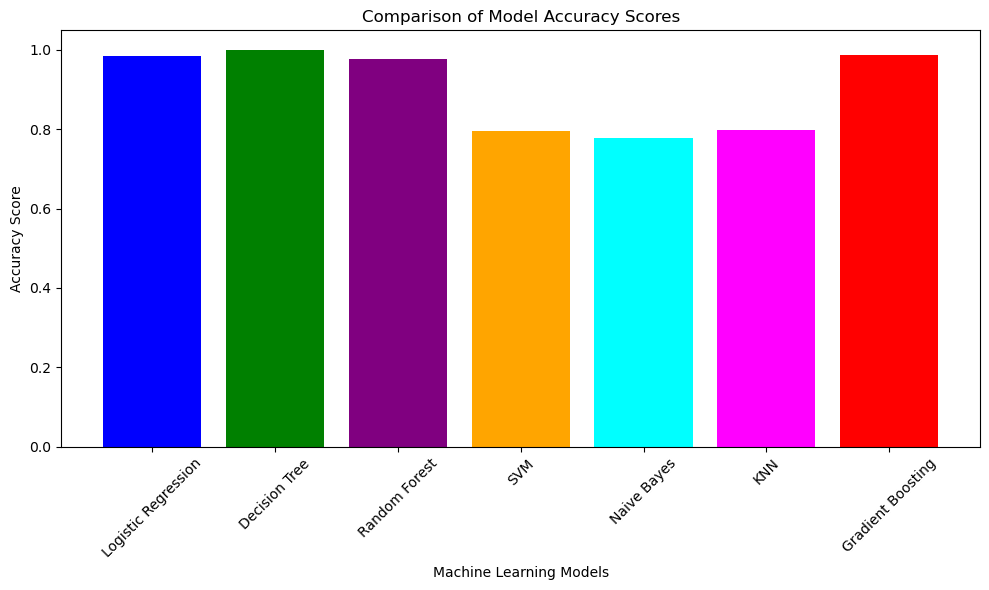

In [79]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
accuracy_scores = [0.984, 0.999, 0.977, 0.795, 0.777, 0.797, 0.988]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if needed
plt.tight_layout() # Ensures labels are not cut off
for bar, score in zip(bars, accuracy_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)


# 26 These precision scores measure the proportion of true positive predictions among all positive predictions made by each model. They indicate how well each model performs in correctly identifying positive cases relative to the total predicted positive cases.


Based on the precision scores for the machine learning models:

Logistic Regression: 97.9%

Decision Tree: 99.8%

Random Forest: 97.1%

SVM (Support Vector Machine): 79.0%

Naive Bayes: 90.1%

KNN (K-Nearest Neighbors): 82.5%

Gradient Boosting: 98.4%


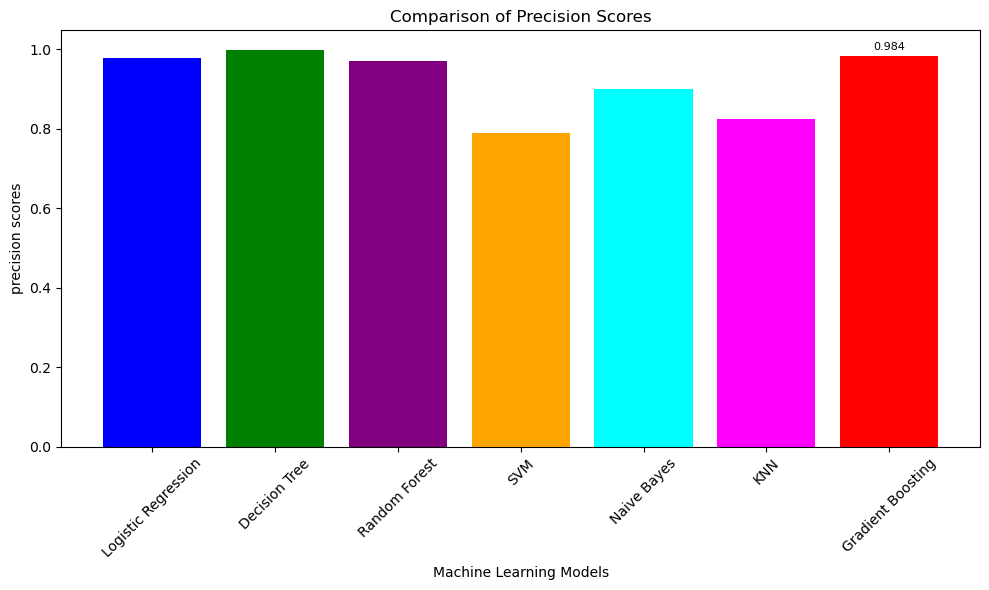

In [80]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
precision_scores = [0.979,0.998,0.971,0.790,0.901,0.825,0.984]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, precision_scores, color=colors) # Assign the result␣of plt.bar to the variable 'bars'
plt.xlabel('Machine Learning Models')
plt.ylabel('precision scores')
plt.title('Comparison of Precision Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, precision_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()


# 27 Recall score measures the proportion of true positive instances that were correctly identified by the model out of all actual positive instances. A score of 1.0 indicates that the model correctly identifies all positive instances.


Based on the Recall scores for the machine learning models:

Logistic Regression: 1.0

Decision Tree: 1.0

Random Forest: 1.0

SVM (Support Vector Machine): 1.0

Naive Bayes: 0.803

KNN (K-Nearest Neighbors): 0.938

Gradient Boosting: 1.0


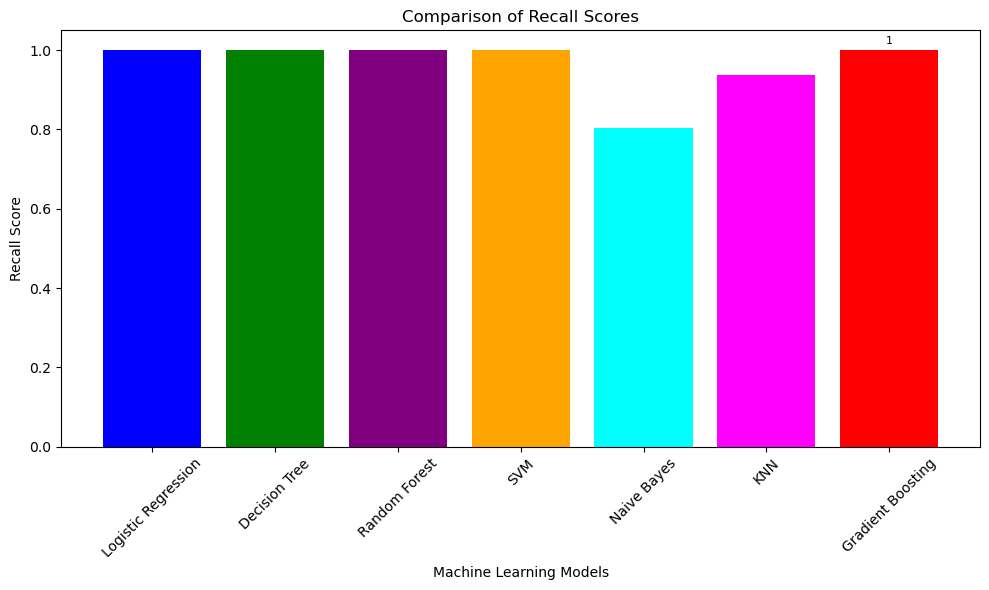

In [81]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
Recall_scores = [1,1,1,1,0.803,0.938,1]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable 'bars' so it is available for use later
bars = plt.bar(model_names, Recall_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
# Iterate over the bars and scores using zip
for bar, score in zip(bars, Recall_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()


# 28 The F1 score combines precision and recall into a single metric and ranges from 0 to 1, where a higher score indicates better performance.

Based on the F1 scores provided for the machine learning models:

Logistic Regression: 0.989

Decision Tree: 0.999

Random Forest: 0.985

SVM (Support Vector Machine): 0.883

Naive Bayes: 0.849

KNN (K-Nearest Neighbors): 0.878

Gradient Boosting: 0.992


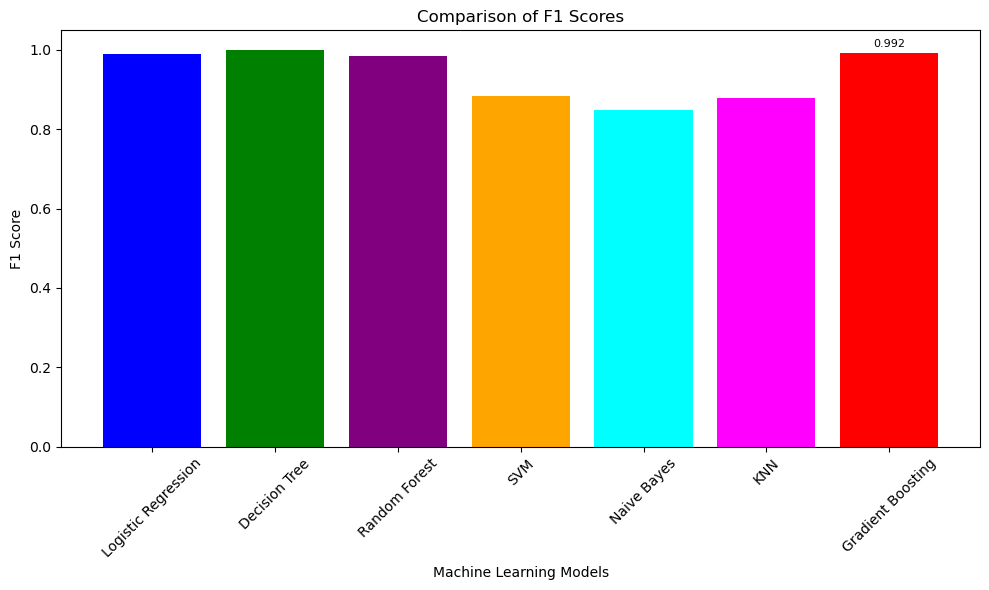

In [83]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
F1_scores = [0.989,0.999,0.985,0.883,0.849,0.878,0.992]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable bars
bars = plt.bar(model_names, F1_scores, color=colors) # Changed to plot␣F1_scores instead of precision_scores
plt.xlabel('Machine Learning Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, F1_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()


# 29 Based on the provided evaluation metrics (accuracy, precision,F1 scores, and recall) for the machine learning models, we can draw the following conclusions:


# 29.0.1 Conclusion

## 1. Decision Tree:
• Highest accuracy (99.9%), precision (99.8%), and F1 score (0.999).

• Perfect recall (1.0).

• Overall, the top-performing model across all metrics.

## 2. Gradient Boosting:
• High accuracy (98.8%), precision (98.4%), and F1 score (0.992).

• Perfect recall (1.0).

• Strong overall performance, just behind Decision Tree.

## 3. Logistic Regression:
• High accuracy (98.4%), precision (97.9%), and F1 score (0.989).

• Perfect recall (1.0).

• Consistently strong performance across all metrics.


## 4. Random Forest:
• High accuracy (97.7%), precision (97.1%), and F1 score (0.985).

• Perfect recall (1.0).

• Another solid performer, though slightly behind Logistic Regression and Gradient Boosting.


## 5. SVM:
• Moderate accuracy (79.5%) and precision (79.0%).

• Perfect recall (1.0).

• Moderate F1 score (0.883).

• Performs well in recall but lags in accuracy and precision.


## 6. KNN:
• Moderate accuracy (79.7%), precision (82.5%), and F1 score (0.878).

• Good recall (0.938).

• Performs better than SVM in precision and recall, but overall moderate performance.


## 7. Naive Bayes:

• Lowest accuracy (77.7%), and F1 score (0.849).

• Good precision (90.1%), but lowest recall (0.803).

• Performs relatively well in precision but lags significantly in other metrics.


# 29.0.2 Summary

###  Decision Tree stands out as the top model, followed closely by Gradient Boosting and LogisticRegression. Random Forest also shows strong performance. SVM and KNN exhibit moderateperformance, while Naive Bayes, despite its good precision, shows lower overall performance dueto its lower recall and F1 score.
